In [203]:
import pandas as pd

df = pd.read_csv("sentiment_tweets3.csv")

In [204]:
df.head()

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [205]:
tweets = df[["message to examine","label (depression result)"]]

In [206]:
print(tweets["label (depression result)"][0])

0


In [207]:
tweets["label (depression result)"].apply(lambda x: int(x))

0        0
1        0
2        0
3        0
4        0
        ..
10309    1
10310    1
10311    1
10312    1
10313    1
Name: label (depression result), Length: 10314, dtype: int64

In [208]:
tweets_positive = tweets[tweets["label (depression result)"]==1]
tweets_negative = tweets[tweets["label (depression result)"]==0]

In [209]:
print(len(tweets_positive))

2314


In [210]:
print(len(tweets_negative))

8000


In [211]:
import preprocess_kgptalkie as ps
import re

In [212]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ')
    x = ps.cont_exp(x)
    x = ps.remove_emails(x)
    x = ps.remove_urls(x)
    x = ps.remove_html_tags(x)
    x = ps.remove_rt(x)
    x = ps.remove_accented_chars(x)
    x = ps.remove_special_chars(x)
    x = re.sub("(.)\\1{2,}", "\\1", x)
    return x

In [223]:
tweets_positive["message to examine"] = tweets_positive["message to examine"].apply(lambda x: get_clean(x))
tweets_negative["message to examine"] = tweets_negative["message to examine"].apply(lambda x: get_clean(x))

In [224]:
import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()

In [225]:
def get_vec(x):
    doc = nlp(x)
    l = doc.vector
    return l

In [227]:
tweets_positive["vec"]= tweets_positive["message to examine"].apply(lambda x: get_vec(x))
tweets_negative["vec"]= tweets_negative["message to examine"].apply(lambda x: get_vec(x))

In [320]:
vis_data = pd.concat([tweets_positive[0:6],tweets_negative[5:20]])

In [321]:
vis_data

,message to examine,label (depression result),vec
8000,the lack of this understanding is a small but ...,1,"[-0.03867774, 0.23430629, -0.17567559, 0.00380..."
8001,i just told my parents about my depression and...,1,"[-0.021896234, 0.2310594, -0.26400685, -0.0269..."
8002,depression is something i do not speak about e...,1,"[-0.09944324, 0.1876139, -0.2644123, -0.116623..."
8003,made myself a tortilla filled with pbj my depr...,1,"[0.04489332, 0.056927957, -0.062049057, 0.0950..."
8004,worldofoutlaws i am gonna need depression meds...,1,"[-0.01622743, 0.1050395, -0.21156085, -0.01605..."
8005,my anxiety and my depression fighting over who...,1,"[-0.13449192, 0.2562298, -0.094564065, 0.06617..."
5,so sleepy good times tonight though,0,"[0.0025256623, 0.25395435, -0.30452, -0.186252..."
6,silkcharm re nbn as someone already said does ...,0,"[-0.002803064, 0.14912254, -0.17270069, -0.044..."
7,23 or 24i12c possible today nice,0,"[-0.148534, 0.28846383, -0.089124165, 0.059416..."
8,nite twitterville workout in the am ciao,0,"[0.050872426, 0.23470214, -0.080447145, -0.045..."


In [322]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [323]:
X = np.array(cosine_similarity(vis_data["vec"].tolist()))

In [ ]:
print(X)

In [325]:
import networkx as nx
import matplotlib.pyplot as plt

In [326]:
G = nx.Graph()
for i in range(len(X)):
    for j in range(i+1,len(X)):
        G.add_edge(i,j,weight=X[i,j])
elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

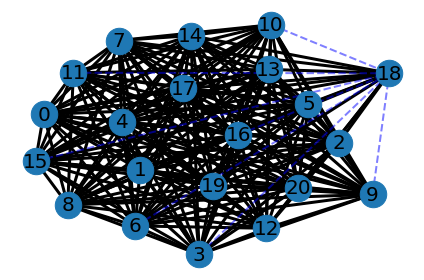

In [328]:

pos = nx.spring_layout(G, seed=7)
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=2, alpha=0.5, edge_color="b", style="dashed"
)
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.tight_layout()
plt.show()

In [334]:
print(G.get_edge_data(0,9))

{'weight': 0.61950636}
